## Observations and Insights 

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how ='outer')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [101]:
# Checking the number of mice.
number_of_mice = len(combined_data["Mouse ID"].value_counts())
number_of_mice


249

In [102]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseID = pd.DataFrame(duplicate_mice)
duplicate_mouseID


,0
0,g989


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]


In [12]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = len(clean_df["Mouse ID"].value_counts())
number_of_mice_clean

248

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean

regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem

summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_groupby = clean_df.groupby('Drug Regimen')
summary_stats_2= single_groupby.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_2


/var/folders/qf/fpbk_bwj1kzffkn70_ppsn600000gn/T/ipykernel_31704/1815100639.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats_2= single_groupby.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

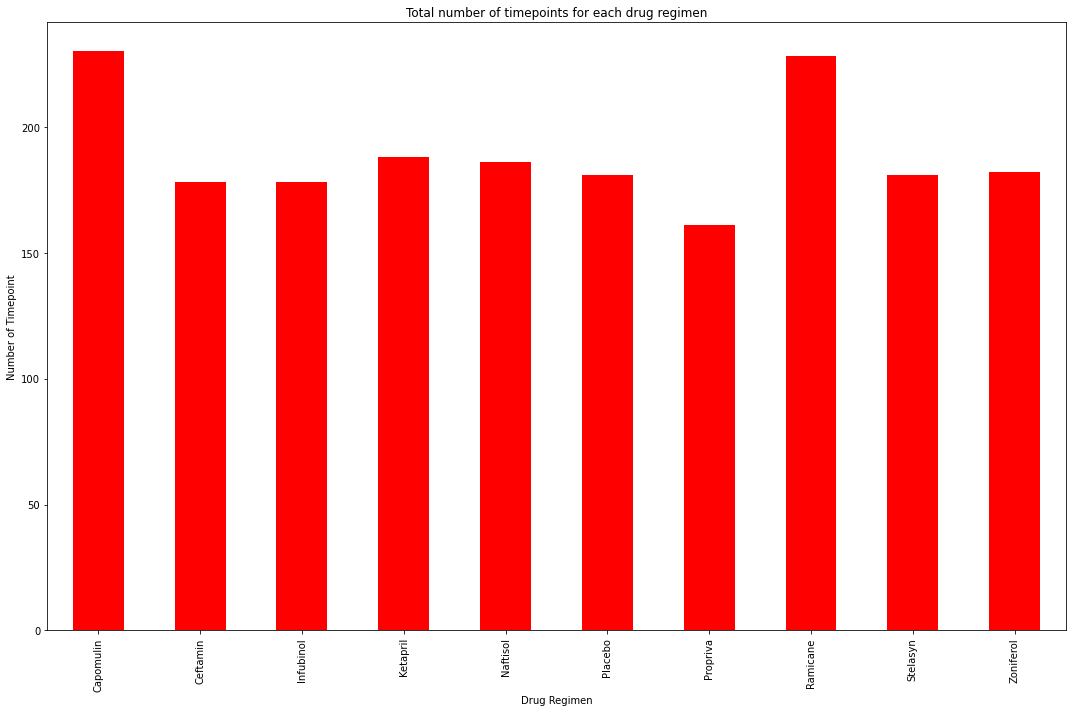

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoints = combined_data.groupby(["Drug Regimen"]).count()["Timepoint"] 
timepoints_plot = total_timepoints.plot.bar(figsize=(15,10), color='r')
timepoints_plot

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoint")
plt.title("Total number of timepoints for each drug regimen")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Total number of timepoints for each drug regimen')

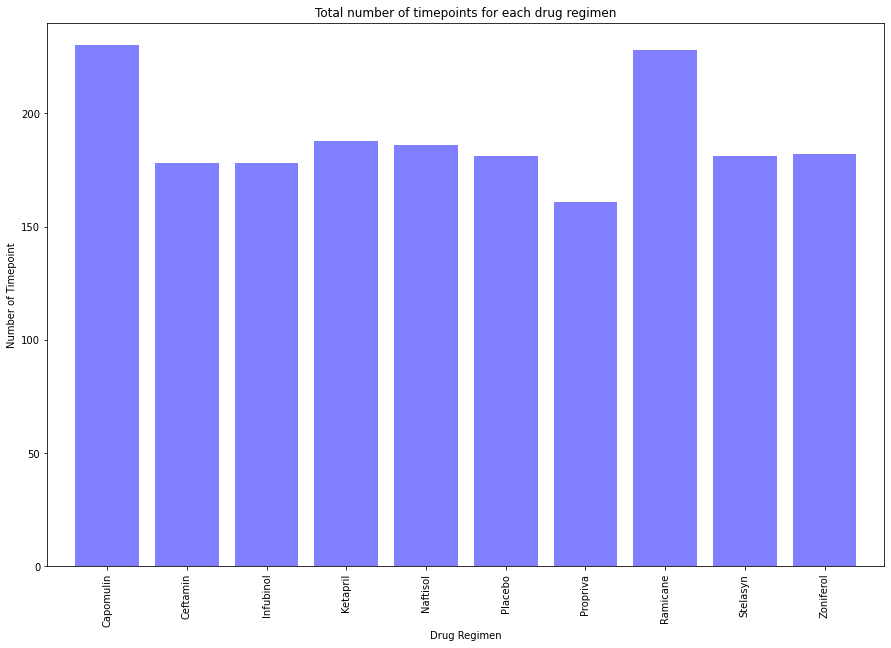

In [104]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
total_timepoints = combined_data.groupby(["Drug Regimen"]).count()["Timepoint"] 
timepoints_df = pd.DataFrame(total_timepoints)
timepoints_df["Timepoint"]
x_axis = np.arange(len(total_timepoints))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, timepoints_df["Timepoint"] , color='b', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(timepoints_df["Timepoint"])+10)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoint")
plt.title("Total number of timepoints for each drug regimen")



(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

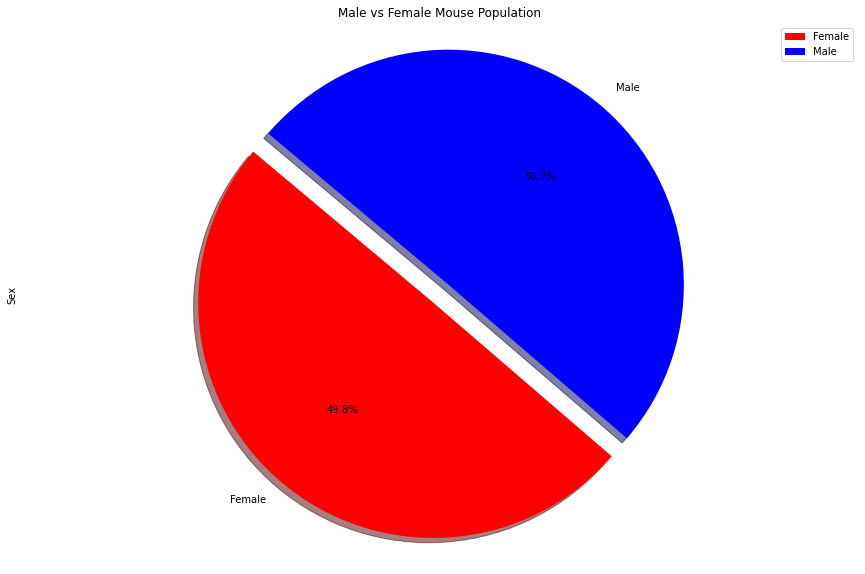

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_groupby = combined_data.groupby(["Mouse ID","Sex"])
gender_groupby
gender_df = pd.DataFrame(gender_groupby.size())

mice_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total"]

mice_gender["Percentage"] = round((100*(mice_gender["Total"]/mice_gender["Total"].sum())),2)

mice_gender.head()

colors = ['red', 'blue']
explode = (0.1, 0)
plot = mice_gender.plot.pie(y='Total',figsize=(15,10), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.axis("equal")


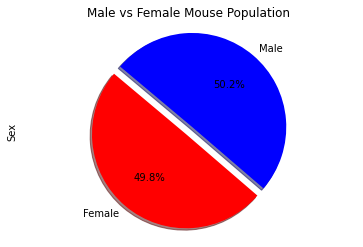

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

colors = ['red', 'blue']

explode = (0.1, 0)

plt.pie(mice_gender["Total"], explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')

plt.axis("equal")

plt.show()


## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_greatest = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_volume = pd.DataFrame(Capomulin_greatest)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_volume, combined_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [55]:
# Start by getting the last (greatest) timepoint for each mouse
Ramicane_greatest = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_volume = pd.DataFrame( Ramicane_greatest)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ramicane_merge = pd.merge( Ramicane_volume, combined_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [56]:
# Start by getting the last (greatest) timepoint for each mouse
Infubinol_greatest = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_volume = pd.DataFrame(Infubinol_greatest)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Infubinol_merge = pd.merge(Infubinol_volume, combined_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [57]:
# Start by getting the last (greatest) timepoint for each mouse
Ceftamin_greatest = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_volume = pd.DataFrame(Ceftamin_greatest)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ceftamin_merge = pd.merge(Ceftamin_volume, combined_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [60]:
# Put treatments into a list for for loop (and later for plot labels)
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]
# Create empty list to fill with tumor vol data (for plotting)
plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Determine outliers using upper and lower bounds

quartiles_Ca =Capomulin_tumors.quantile([.25,.5,.75])
lowerq_Ca = quartiles_Ca[0.25]
upperq_Ca = quartiles_Ca[0.75]
iqr_Ca = upperq_Ca-lowerq_Ca

lower_bound_C = lowerq_Ca - (1.5*iqr_Ca)
upper_bound_C = upperq_Ca + (1.5*iqr_Ca)


quartiles_R =Ramicane_tumors.quantile([.25,.5,.75])
lowerq_R = quartiles_R[0.25]
upperq_R = quartiles_R[0.75]
iqr_R = upperq_R-lowerq_R

lower_bound_R = lowerq_R - (1.5*iqr_R)
upper_bound_R = upperq_R + (1.5*iqr_R)


quartiles_I =Infubinol_tumors.quantile([.25,.5,.75])
lowerq_I = quartiles_I[0.25]
upperq_I = quartiles_I[0.75]
iqr_I = upperq_I-lowerq_I

lower_bound_I = lowerq_I- (1.5*iqr_I)
upper_bound_I = upperq_I + (1.5*iqr_I)


quartiles_Ce =Ceftamin_tumors.quantile([.25,.5,.75])
lowerq_Ce = quartiles_Ce[0.25]
upperq_Ce = quartiles_Ce[0.75]
iqr_Ce = upperq_Ce-lowerq_Ce

lower_bound_Ce = lowerq_Ce - (1.5*iqr_Ce)
upper_bound_Ce = upperq_Ce + (1.5*iqr_Ce)


Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']  


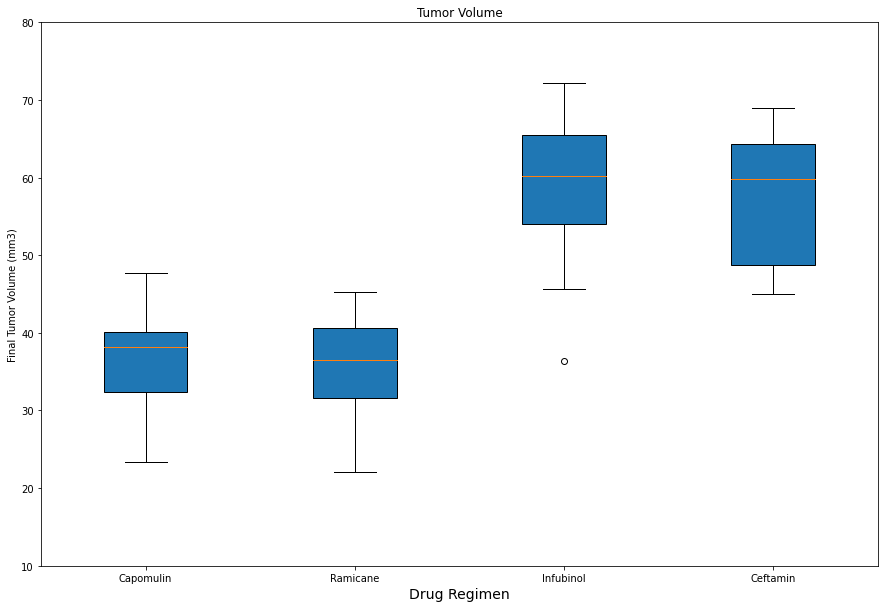

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.show()

## Line and Scatter Plots

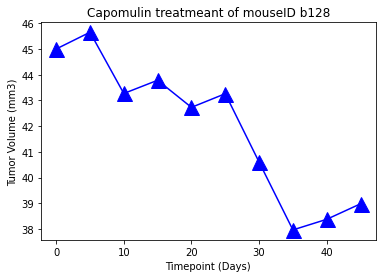

In [68]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lineplot_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b128",:]
lineplot_df.head()

x_axis = lineplot_df["Timepoint"]
tumor = lineplot_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouseID b128')
plt.plot(x_axis, tumor, markersize=15,marker="^",color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

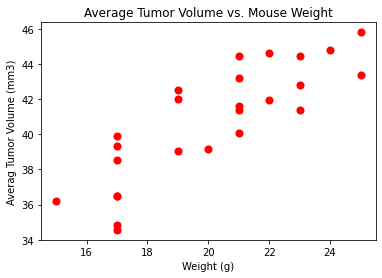

In [74]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mean =Capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(mean['Weight (g)'],mean['Tumor Volume (mm3)'],s=50, color="red")
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [88]:
# Calculate the correlation coefficient and linear regression model 
corr=round(st.pearsonr(mean['Weight (g)'],mean['Tumor Volume (mm3)'])[0],2)
print(f"The correlation of mouse weight vs average tumor volume is {corr}")

# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mean['Weight (g)']
y_values = mean['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)



The correlation of mouse weight vs average tumor volume is 0.84
y = 0.95x + 21.55


The r-squared is: 0.7088568047708723


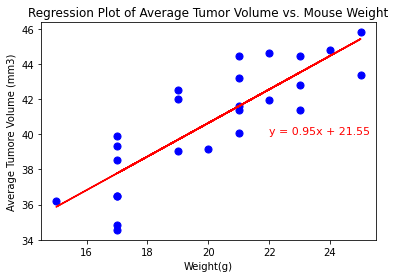

In [99]:

plt.scatter(x_values,y_values,s=50, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.annotate(line_eq, (22,40),fontsize=11,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()